In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. models import load_model
from keras.layers import LSTM
from keras. utils.vis_utils import plot_model

In [ ]:
df=pd.read_csv('RELIANCE.NS.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-31,2276.899902,2283.750000,2242.25,2258.149902,2251.371582,12223037
2021-09-01,2273.000000,2292.899902,2263.00,2267.100098,2260.294922,5143640
2021-09-02,2255.000000,2307.800049,2255.00,2294.399902,2287.512939,4595048
2021-09-03,2310.000000,2395.000000,2302.50,2388.500000,2381.330566,14151629
2021-09-06,2413.000000,2480.000000,2412.00,2425.600098,2418.319092,15525644


In [ ]:
print('Dataframe Shape: ', df. shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (249, 6)
Null Value Present:  False


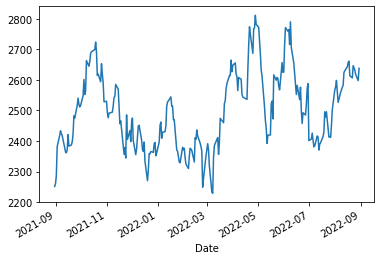

In [ ]:
df['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2021-08-31,0.101450,0.061870,0.102706,0.308623
2021-09-01,0.095401,0.076866,0.136941,0.117569
2021-09-02,0.067478,0.101287,0.123742,0.102764
2021-09-03,0.152796,0.244202,0.202112,0.360670
2021-09-06,0.312573,0.383512,0.382775,0.397751


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

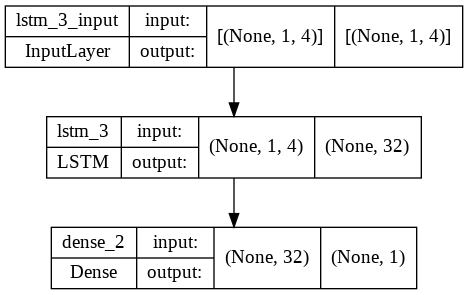

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=200, batch_size=100, verbose=1, shuffle=False)

Epoch 1/200
3/3 [==============================] - 0s 4ms/step - loss: 10689.2793
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 10681.4209
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 10673.7061
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 10666.1025
Epoch 5/200
3/3 [==============================] - 0s 6ms/step - loss: 10658.5811
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 10651.1123
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 10643.6934
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 10636.2998
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 10628.9297
Epoch 10/200
3/3 [==============================] - 0s 6ms/step - loss: 10621.5625
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 10614.2031
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 10606.8447
Epoch 13/200


In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

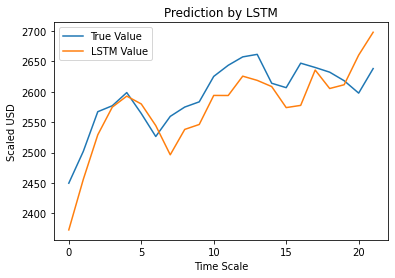

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
rms=np.sqrt(np.mean(np.power((y_test-y_pred),2)))
rms

87.69879949007954